In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn_evaluation.plot import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import metrics

In [2]:
news = pd.read_csv(r'C:\Users\ADS\Desktop\Classification\data\aggregator.csv')
#news.head()

In [3]:
news.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027


In [36]:
#len(news)
len(news[news.CATEGORY=='m'])

45639

In [3]:
news['CATEGORY'].unique() # unique category labels

array(['b', 't', 'e', 'm'], dtype=object)

(-1.101639420124838,
 1.1000780787490432,
 -1.1090927453255768,
 1.1174362845275305)

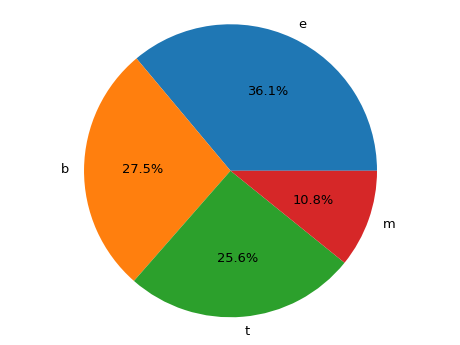

In [5]:
###Visualizing the Data

news.CATEGORY.value_counts().plot(kind='pie', 
                                  figsize=(8,6), 
                                  fontsize=13, 
                                  autopct='%1.1f%%', 
                                  wedgeprops={'linewidth': 5}
                                  )
plt.axis('off')
plt.axis('equal')

# Nettoyage du DataSet

In [ ]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [ ]:
#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    if(type(text) == str):
        for i in text.split():
            if i.strip().lower() not in stop:
                final_text.append(i.strip())
        return " ".join(final_text)
    return text
#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', str(text))
# Removing URL's
def remove_between_square_bracketsLien(text):
    return re.sub(r'http\S+', '', str(text))
def remove_email(text):
    return re.sub("([A-Za-z0-9]+[.-_])*[A-Za-z0-9]+@[A-Za-z0-9-]+(\.[A-Z|a-z]{2,})+",'',str(text))
def met_en_minuscule(text):
    
    if(type(text)==str): return text.lower()
    return text

#Removing the noisy text
def denoise_text(li):
    li_temp = []
    for text in li:
        #text = strip_html(text)
        text = remove_stopwords(text)
        text = met_en_minuscule(text)
        text = remove_email(text)
        text = remove_between_square_brackets(text)
        text = remove_between_square_bracketsLien(text)
        
        
        li_temp.append(text)
    return li_temp

# Models Naive Bayes

In [3]:
# convert data to vectors
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(news['TITLE'])
y = news['CATEGORY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42) # 30% split


In [5]:
X_train_count=vectorizer.fit_transform(X_train)

In [10]:
tf=TfidfTransformer()
X_train_tf=tf.fit_transform(X_train)

In [4]:
mnb = MultinomialNB(alpha=1)
classifier=mnb.fit(X_train, y_train)

In [64]:
print(X_train_tf)

  (0, 46296)	0.35670724170993034
  (0, 41957)	0.4450644934255902
  (0, 38150)	0.4973985077526234
  (0, 31979)	0.3645528907143753
  (0, 30493)	0.40552748468905625
  (0, 20325)	0.3604454382046465
  (1, 46714)	0.2857072377134736
  (1, 37405)	0.2715957148293267
  (1, 31297)	0.5142641795945851
  (1, 27574)	0.2992199096913338
  (1, 25876)	0.381464870456837
  (1, 23381)	0.29174348792779725
  (1, 16886)	0.2994010613165797
  (1, 13241)	0.33341149129365444
  (1, 12583)	0.2432550370488163
  (2, 36970)	0.3201442813046916
  (2, 36698)	0.3049868007788827
  (2, 36139)	0.4581967960179431
  (2, 17006)	0.338151170029128
  (2, 15140)	0.3468023578474139
  (2, 11464)	0.4903096423629304
  (2, 8311)	0.3457235196263011
  (3, 38734)	0.6210381893264353
  (3, 37825)	0.4604506993455184
  (3, 23114)	0.35385562790100616
  :	:
  (295689, 9938)	0.2651654312482832
  (295689, 9126)	0.3976927795180737
  (295689, 5408)	0.32553959121750736
  (295689, 4824)	0.2686929102822658
  (295690, 40805)	0.2857501100974624
  (295690,

# SGD Classifier

In [11]:
sgd = SGDClassifier(n_jobs=-1, max_iter=10 ,random_state=1234)

# hyperparameters for tuning
sgd_grid = [{'loss': ['hinge', 'log', 'squared_hinge'],
             'alpha': [0.0001, 0.0001, 0.00001]}]


In [14]:
# grid search with cross validation
sgd_search = GridSearchCV(estimator=sgd, param_grid=sgd_grid, cv=5, refit=True)

In [13]:
sgd_search.fit(X_train, y_train)

C:\Users\ADS\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


GridSearchCV(cv=5,
             estimator=SGDClassifier(max_iter=10, n_jobs=-1, random_state=1234),
             param_grid=[{'alpha': [0.0001, 0.0001, 1e-05],
                          'loss': ['hinge', 'log', 'squared_hinge']}])

In [9]:
sgd_search.best_estimator_.score(X_test, y_test)

0.9491659170178179

# teste

In [1]:
# test-category function
def test_to_category(txt):
    '''f=open(title,"r")
    l=f.read()
    f.close()
    '''
    categories = {'b' : 'business', 
                  't' : 'science and technology', 
                  'e' : 'entertainment', 
                  'm' : 'health'}
    #pridicter = sgd_search.best_estimator_.predict(vectorizer.transform([l]))
    pridicter = classifier.predict(vectorizer.transform([txt]))
    return categories[pridicter[0]]

In [8]:
# Exemple :
print("le categorie : ",test_to_category('Music is the art of arranging sounds in time to produce a composition through the elements of melody, harmony, rhythm, and timbre.[1] It is one of the universal cultural aspects of all human societies. General definitions of music include common elements such as pitch (which governs melody and harmony), rhythm (and its associated concepts tempo, meter, and articulation), dynamics (loudness and softness), and the sonic qualities of timbre and texture (which are sometimes termed the "color" of a musical sound). Different styles or types of music may emphasize, de-emphasize or omit some of these elements. Music is performed with a vast range of instruments and vocal techniques ranging from singing to rapping; there are solely instrumental pieces, solely vocal pieces (such as songs without instrumental accompaniment) and pieces that combine singing and instruments. The word derives from Greek μουσική (mousike; "(art) of the Muses");[2] see § Etymology and glossary of musical terminology.'))

le categorie :  entertainment


In [101]:
a=vectorizer.fit_transform(X_test)
b=tf.fit_transform(a)

In [ ]:
sv=SVC(gamma='auto')
mn=sv.fit(X_train_tf,y_train)
#pri=mn.predict(X_test)

In [82]:
print(metrics.classification_report(y_test,pri))

              precision    recall  f1-score   support

           b       0.91      0.91      0.91     34721
           e       0.97      0.96      0.96     45860
           m       0.92      0.92      0.92     13750
           t       0.90      0.91      0.91     32395

    accuracy                           0.93    126726
   macro avg       0.92      0.92      0.92    126726
weighted avg       0.93      0.93      0.93    126726



In [7]:
print(metrics.accuracy_score(y_test,pri))

0.9245300885374745


In [17]:
print(metrics.classification_report(y_test,pri))

              precision    recall  f1-score   support

           b       0.91      0.91      0.91     23414
           e       0.97      0.96      0.96     30353
           m       0.92      0.92      0.92      9024
           t       0.90      0.91      0.90     21693

    accuracy                           0.93     84484
   macro avg       0.92      0.92      0.92     84484
weighted avg       0.93      0.93      0.93     84484



In [8]:
print(metrics.accuracy_score(y_test,pri))

0.9272051512712466


In [22]:
classifier = KNeighborsClassifier(n_neighbors=4)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
pri=classifier.predict(X_test)

In [7]:
pri=mnb.predict(X_test)

In [10]:
print(pri)

['e' 'b' 'e' ... 't' 'e' 'b']


In [10]:
print(y_test)

280241    e
96315     b
280410    e
284975    e
379072    m
         ..
214182    t
247898    t
286187    t
99536     e
302502    t
Name: CATEGORY, Length: 126726, dtype: object
